# Root-finding Algorithms

## Setup
* Many times we are interested in finding $x^*$ that satisfies
$$
    f(x^*) = 0
$$
for some $f:\mathbb R^n\rightarrow\mathbb R^n$ 
*  Note we've already seen an example of this in solving the fixed point problem:
$$
    x = g(x)
$$
* They are isomorphic as a fixed point $g(x*)=x^*$ is equilvalent to the root of
$$
    f(x) = g(x)- x
$$
* And the root of $f(x^*)=0$ is equivalent to the fixed point of
$$
    g(x) = f(x) + x
$$

## Solution Approach
* Nearly all root finding methods have the same structure

* Start with a guess $x_0$

* Apply some algorithm $H(x_0,f)$ to get a new point $x_1$

    * Note algorithm will use properties of $f$

* Keep applying algorithm to get a sequence ${x_n}_n$ via
$$
    x_{n+1} = H(f,x_n)
$$

* Objective is to construct $H$ such that $x_n\rightarrow x^*$

    * Ideally you should get convergence independent of $x_0$

## Speed of Convergence for Root-finding
* A method is said to **q-converge** at rate $k$ if
$$
    \lim_{n\rightarrow\infty}\frac{|x^* - x^{n+1}|}{|x^*-x^n|^k}=C
$$
with $C>0$

* A method is said to **r-converge** at rate $k$ if:

    * The sequence of the successive error terms is dominated by $\{v_n\}$
    $$
        |x^* - x^n| \leq v_n \text{ for all n}
    $$

    * $\{v_n\}$ q-converges at rate k to 0

## Function Iteration
*  If $g$ is a **contraction** then if we start from $x_0$, the iteration given by
$$
    x_{k+1} = g(x_k)
$$
 will converge to $x^*$ for any value $x_0$

*  Does not need to globally be a contraction if $x_0$ is close enough to $x^*$.  Sequence will converge if 
$$
|g'(x^*)| <1
$$

*  Moreover
$$
    x^{n+1}-x^* \approx g'(x^*)(x^n-x^*)
$$
hence this method q-converges linearly (slow)

## Example

In [1]:
g(x) = 2-1.5/(1+x)
x0 = 0.25
diff = 1.
while diff > 1e-6
    global x0,diff
    x1 = g(x0)
    diff = abs(x1 - x0)
    x0 = x1
end
println("The fixed point is: $x0")

The fixed point is: 1.366025288620121


![](assets/roots1.gif)


# Bisection Method

## Description
* This is the simplest and most robust method to find the root of a **one-dimensional continuous** function on a closed interval

* Assumptions:

    * $f(x)$ defined on $[a,b]$ with $f(a)$ and $f(b)$ opposite signs

    * $f(x)$ continuous

* Intermediate value theorem guarantees existence of a root 

* Can construct an algorithm to find one via iteration

## Algorithm 
WLOG assume $f(a) < 0$ and $f(b) >0$

1. Set $n=1$ with $a^n = a$ and $b^n$

2. Construct $c^n = \frac{a^n+b^n}{2}$

3. If $f(c^n) >0$ set $a^{n+1} = a^n$ and $b^{n+1} = c^n$

4. Else set $a^{n+1} = c^n$ and $b^{n+1} = b^n$

5. Stop if $|a^{n+1}-b^{n+1}|<\epsilon$, otherwise go to 2

## Algorithm Code

In [32]:
f(x) = x - g(x)
a,b = 0.5,1.75
diff = 1
while diff > 1e-6
    global a,b,diff
    c = (a+b)/2
    if f(c) > 0
        b = c
    else
        a = c
    end
    diff = b-a
end
println("Root is $((a+b)/2)")

Root is 1.3660253882408142


![](assets/roots2.gif)

## Advantages
* **Robust and Stable:** We are guaranteed to find a root to our desired accuracy

* At the end of the $n^{th}$ iteration we will have an interval of size
$$
    \frac{b-a}{2^{n-1}}
$$

* Thus we will reach accuracy $\delta$ in
$$
    n = 1+\log_2\left(\frac{b-a}{\delta}\right)
$$
steps

* Does not require computation of derivatives, does not need to be differentiable

## Disadvantages
* Does not exploit information about the slope of the function

* This makes the algorithm *slow* (i.e. r-converges linearly)

* Cannot be generalized to multi-dimensional case

## Implementation
* In package `Roots` the function fzero finds a root

* Can either give some initial bounds for the root

In [34]:
fzero(f,0.5,1.5)

1.3660254037844388

* Or an initial guess

In [33]:
fzero(f,1.)

1.3660254037844386

## Exercise 1

Consider a worker with utility function
$$
U(c,l) = log(c) - \frac{l^{1+\gamma}}{1+\gamma}
$$
where $c$ is consumption and $l$ is hours worked.  They recieve a wage $W$ per hour and a transfer $T$ from the government.  Their budget constraint is
$$
c = Wl+T
$$

* Write code to find the optimal choice of consumption and labor given W and T

# Newton's Method


## Description
* This is the classical method for solving $f(x)=0$

* Begin by approximating $f$
$$
    f(x) \approx f(x^n) + f'(x^n)(x-x^n)
$$

* $x^{n+1}$ is root of approximating function
$$
   x^{n+1} = x^n - \frac{f(x^n)}{f'(x^n)}
$$

## Implementation

In [3]:
f(x) = x^3-.05
df(x) = 3*x^2
x0 = 1.
diff = 1.
while diff > 1e-6
    global diff,x0
    x1 = x0 - f(x0)/df(x0)
    x0 = x1
    diff = abs(x1-x0)
end
println("The root is $x0")

The root is 0.6833333333333333


![](assets/roots3.gif)

## Advantages and Disadvantages
* Newtons method is fast

    * The q-converges quadratically (at a rate 2)

* **Unstable** if function changes derivative quickly

    * Can get stuck in infinite loops

* **Extensions** to the algorithm such as backstepping can aliviate

    * If step doesn't improve over $x^n$, cut step in half.

* Derivative is **needed** for algorithm

    * However, can use approximations (many ways to do this)

    * Finite differences, quasi-newton, automatic differentiation...

# Application: The Shooting Algorithm

## Back to Our Neoclassical Growth Model
* Here we'll present a common tool for solving a perfect forsight model
    * The shooting algorithm (this name will become clear soon)

* For this example we'll work with the neoclassical growth model:
$$
\begin{aligned}
    c_t^{-\sigma} &= \beta R_{t+1}c_{t+1}^{-\sigma}\\
    R_t &=\alpha A k_t^{\alpha -1} + 1 - \delta\\
    c_t + k_{t+1} &= A k_t^\alpha +(1-\delta) k_t  
\end{aligned}
$$
* We know how to solve for the steady state of this problem
$$
\begin{aligned}
    1&= \beta \bar R\\
    \bar R &=\alpha A \bar k^{\alpha -1} + 1 - \delta\\
    \bar c + \bar k &= A \bar k^\alpha +(1-\delta) \bar k  
\end{aligned}
$$
* If $k_0 = \bar k$ then $k_t = \bar k$ for all $t$

## The Neoclassical Model

In [4]:
using Parameters,Roots,Plots
@with_kw mutable struct NCParameters
    A::Float64 = 1.  #Productivity
    α::Float64 = 0.3 #Capital Share of Output
    β::Float64 = 0.96 #Discount Factor
    δ::Float64 = 0.1 #Depreciation Rate
    σ::Float64 = 2.  #1/IES
end;

In [5]:
default(linewidth=2,legend=false,margin=10Plots.mm,size=(1500,500))

## Solving For The Steady State

In [6]:
"""
    compute_steadystate(para::NCParameters)

Computes steady state given parameters stored in para
"""
function compute_steadystate(para::NCParameters)
    @unpack A,α,β,δ,σ = para
    R̄ = 1/β
    k̄ =((R̄ - 1 + δ)/(α * A))^(1/(α-1))

    c̄ = A*k̄^α - δ*k̄

    return c̄,k̄
end;
para =NCParameters()
c̄,k̄ = compute_steadystate(para)

(1.087194911375516, 2.9208221499640707)

## A Transition Path
* But what happens if $k_0\neq \bar k$?
    * We need to solve for a path $\{k_t\}_{t=0}^\infty$
    * Needs to satisfies our equilibrium conditions

* What happens if we guess an arbitrary $c_0$?
    * $k_1$ is pinned down by the resource constraint
    $$
        k_1 =  A k_0^\alpha -\delta k_0 - c_0  
    $$
    * $k_1$ then implies a rate of return 
    $$
        R_1 =\alpha A k_1^{\alpha -1} + 1 - \delta
    $$
    * There is only on $c_1$ that satisfies the Euler equation
    $$
        c_1 = \left( \frac{c_0^{-\sigma}}{\beta R_1} \right)^{-1/\sigma}
    $$

* Can keep iterating $c_0->k_1->R_1->c_1->k_2->R_2->c_3....$

## Implementing the Iteration

In [7]:
"""
    iterateEuler(para::NCParameters,c,k)

Computes consumption and capital next period that 
satisfies the Euler equation. 
"""
function iterateEuler(para::NCParameters,c,k)::Vector{Float64}
    @unpack A,α,β,δ,σ = para
    k′ = A*k^α + (1-δ)*k - c
    if k′ > 0 #check to see if k′ makes sense
        R′ = α*A*(k′)^(α-1) + 1 -δ

        c′ = (β*R′*c^σ)^(1/σ)
        return [c′,k′]  
    else
        return zeros(2)
    end
end
#check if steady state is a fixed point
iterateEuler(para,c̄,k̄) - [c̄,k̄]

2-element Vector{Float64}:
 0.0
 0.0

## What Could Go Wrong?

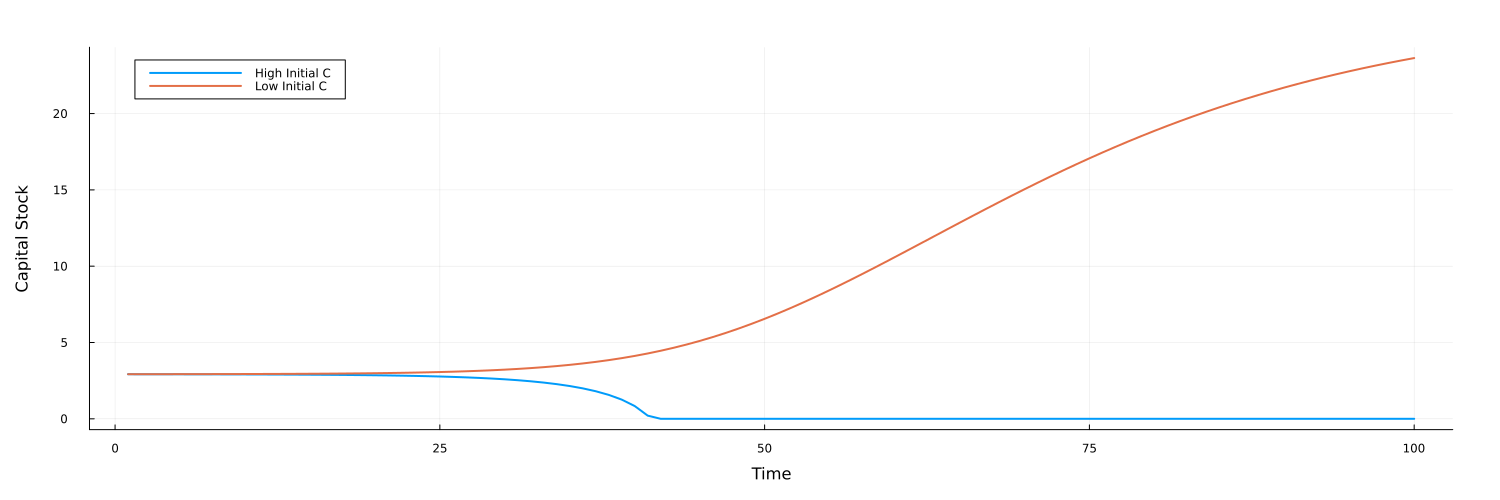

In [29]:
"""
    getshootingpath(para::NCParameters,c0,k0,T=100)

Computes the path generated by iterating on the Euler
equation for T periods.
"""
function getshootingpath(para::NCParameters,c0,k0,T=100)
    k,c = zeros(T),zeros(T)
    c[1],k[1] = c0,k0
    for t in 1:T-1
        c[t+1],k[t+1] = iterateEuler(para,c[t],k[t])
    end

    return (c=c,k=k) #named tuple for easy access
end

plot(getshootingpath(para,c̄+0.001,k̄).k,label="High Initial C",legend=true)
plot!(getshootingpath(para,c̄-0.001,k̄).k,label="Low Initial C",xlabel="Time",ylabel="Capital Stock")

## Sadle Point
* The optimal allocation exists on a sadle point
    * If consumption is initially too high, capital will converge to 0
    * If consumption is initially too low, capital will blow up

* At exactly the optimal level of consumption the path will converge to steady state

* How do we find that level of consumption:
    * A root solver!



## Finding Optimal Consumption

In [9]:
"""
    findoptimal_c(para,k)

Finds the optimal consumption for a given level of capital.  Uses
shooting method with terminal T periods
"""
function findoptimal_c(para::NCParameters,k0,T=100)
    c̄,k̄ = compute_steadystate(para)
    #iterates on the Euler equation for T periods then returns 
    #capital relative to steady state
    function c_res(c0)
        c,k = iterateEuler(para,c0,k0)
        for t in 1:T
            c,k =  iterateEuler(para,c,k)
        end

        return k - k̄
    end
    #use bracketing algorithm
    fzero(c_res,(0.1*c̄,10*c̄))
end
println(findoptimal_c(para,k̄) - c̄)

-2.220446049250313e-16


## Optimal Path: From Steady State

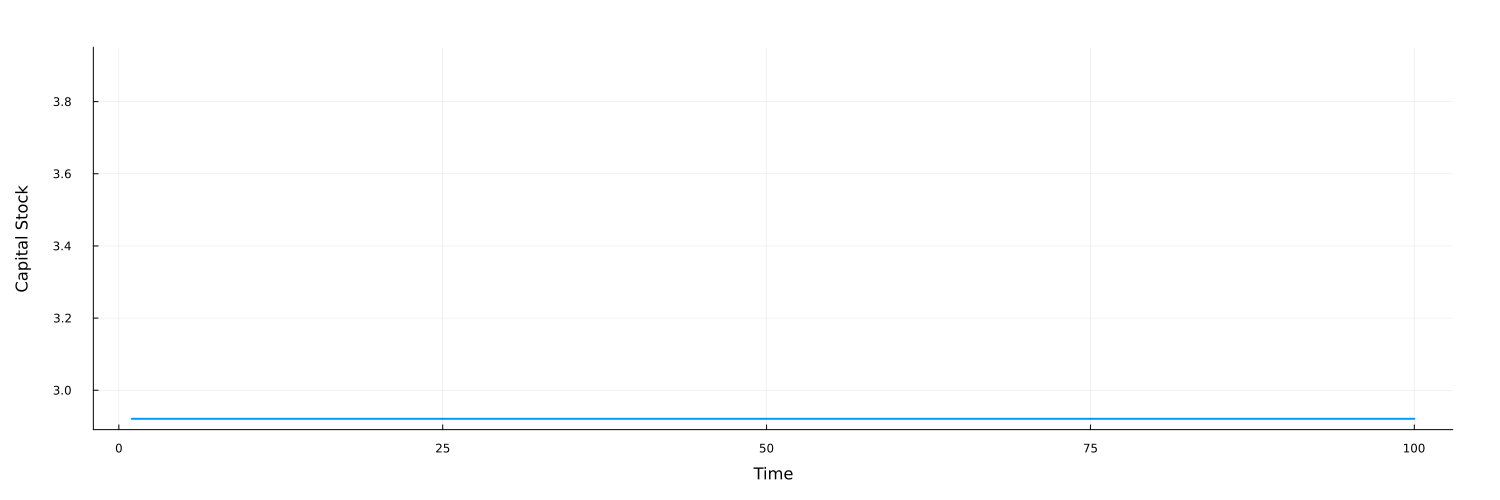

In [10]:
k0=k̄
plot(getshootingpath(para,findoptimal_c(para,k0),k0).k,xlabel="Time",ylabel="Capital Stock")

## Optimal Path: From Below Steady State

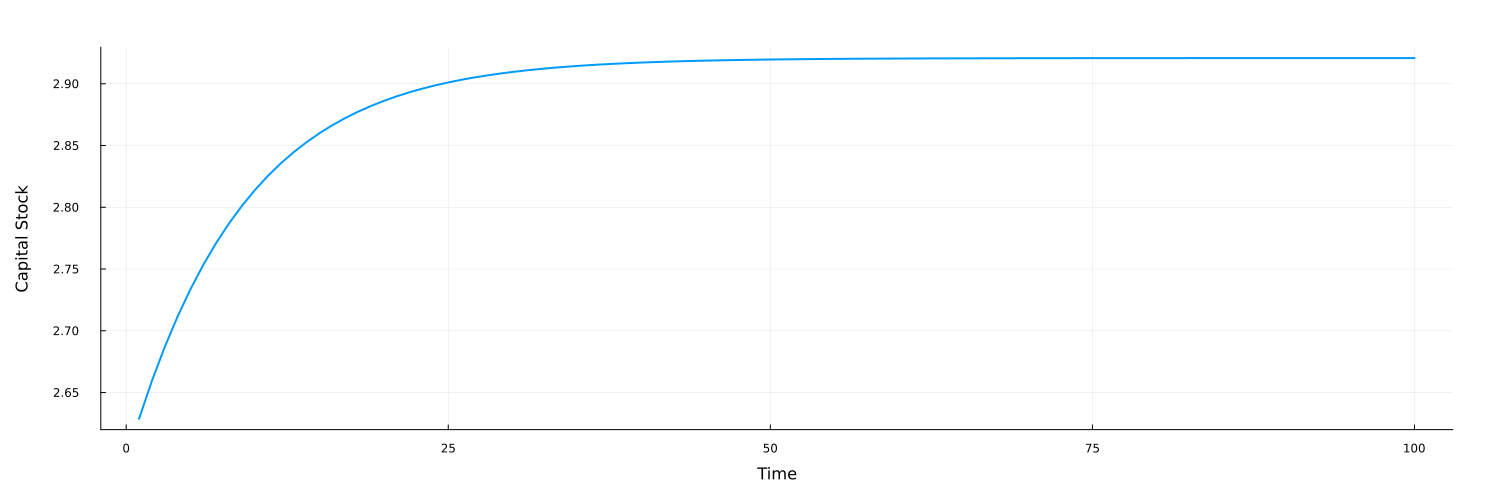

In [11]:
k0=0.9*k̄
plot(getshootingpath(para,findoptimal_c(para,k0),k0).k,xlabel="Time",ylabel="Capital Stock")

## Optimal Path: From Above Steady State

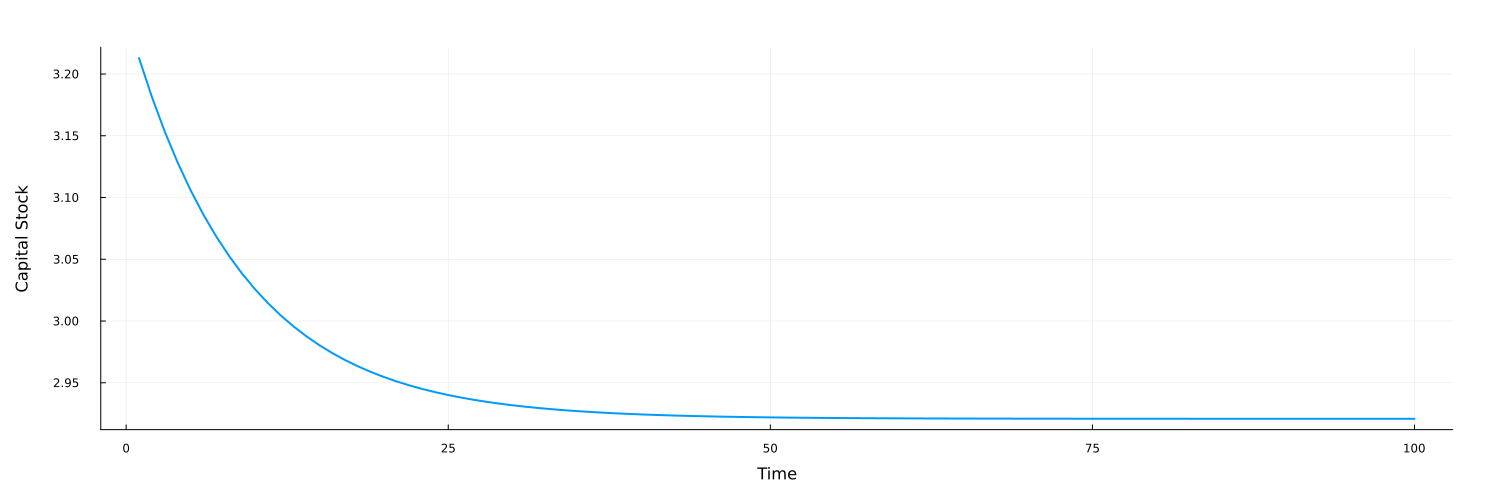

In [12]:
k0=1.1*k̄
plot(getshootingpath(para,findoptimal_c(para,k0),k0).k,xlabel="Time",ylabel="Capital Stock")

# Multivariate Root Solving

## Extending Newton's Method
* Most are some variant of a multivariate  version of Newton's method

* Let $\mathbf f:\mathbb R^k\rightarrow\mathbb R^k$ represent a system of $k$ equations and $k$ unknowns

* Given $\mathbf x^n$, if we know the Jacobian, $\mathbf J^n$, at $x^n$ then $f$ can be approximated by
$$
\mathbf f(\mathbf x) \approx \mathbf f(\mathbf x^n) + \mathbf J^n(\mathbf x-\mathbf x^n)
$$

* This yields a candidate of
$$
    \mathbf x^{n+1} = \mathbf x^n - (\mathbf J^n)^{-1}\mathbf f(x^n)
$$


## Issues
* Generally speaking with multivariate root solving more can go wrong

    * Functions can be much less well behaved

* Also computing the derivative gets slower and slower, i.e. $k^2$ terms

* There are many different rootsolving algorithms

    * If you run into problems switch to another

    * You'd be surprised how often this is successful

* We'll use the "NLsolve" package but there are others

    * Plus easy wrapping of C code: GSL

## Using NLsolve

In [13]:
using NLsolve

#consider this function
f(x) = [(x[1]+3)*(x[2]^3-7)+18, sin(x[2]*exp(x[1])-1)];

res = nlsolve(f,[ 0.,0.])
#not_in_place?
println("Did the root solver converge: $(converged(res))")
println("What was the solution: $(res.zero)")
println("Check f at solution: $(f(res.zero))")

Did the root solver converge: true
What was the solution: [1.8541140520222502e-17, 1.0]
Check f at solution: [0.0, 0.0]


## Alternative: Provid derivatives

In [14]:
#Note fvec is filled with function values
function f!(fvec,x )
    fvec[1] = (x[1]+3)*(x[2]^3-7)+18
    fvec[2] = sin(x[2]*exp(x[1])-1)
end;
#NOTE: NEED DERIVATIVES TO BE EXACT!
function g!(fjac,x)
    fjac[1, 1] = x[2]^3-7
    fjac[1, 2] = 3*x[2]^2*(x[1]+3)
    u = exp(x[1])*cos(x[2]*exp(x[1])-1)
    fjac[2, 1] = x[2]*u
    fjac[2, 2] = u
end;

res = nlsolve(f!,g!,zeros(2))
println("Did the root solver converge: $(converged(res))")
println("What was the solution: $(res.zero)")
println("Check f at solution: $(f(res.zero))")

Did the root solver converge: true
What was the solution: [-1.2312856966480388e-16, 1.0]
Check f at solution: [0.0, -1.1102230246251565e-16]


## Compare speeds

In [15]:
@time nlsolve(f,zeros(2));
@time nlsolve(f!,g!,zeros(2));

  0.000068 seconds (317 allocations: 12.812 KiB)
  0.000036 seconds (210 allocations: 8.219 KiB)


# Solving Perfect Foresight Models

## Another Way To Solve Perfect Forsight Models
* Instead of shooting algorithm:
    * Think of optimal path as multidimensional problem

* Want: $\{k_t\}_{t=0}^\infty$ that statisfies equilibrium conditions
    
* Solving for the infinite path would be impracticable
    
* But we can assume $k_t\approx \bar k$ for $t>T$
    * After long enough we are at steady state

* Problem then reduces to finding $\{k_t\}_{t=0}^T$

## Residuals of Equilibrium Conditions

In [16]:
"""
    capitalpath_residual(para,k0::Float64,k::Vector{Float64})

Computes the euler equation errors given a guess of k[t] = kpath[t]
for t <=T and k[t] = k̄ after.
"""
function capitalpath_residual(para::NCParameters,k0::Float64,kpath::Vector{Float64})
    @unpack A,α,β,δ,σ = para
    c̄,k̄ = compute_steadystate(para)
    T = length(kpath)
    k = [k0;kpath;k̄]
    #compute path of c given guess of k
    c = [A*k[t]^α + (1-δ)*k[t] - k[t+1] for t in 1:T+1]
    #compute path of R given guess of k
    R = [1-δ+α*A*k[t]^(α-1) for t in 1:T+1]
    uc = c.^(-σ)

    #compute Euler equation residuals
    return uc[1:T] .- β .* R[2:T+1].*uc[2:T+1]
end;

## Using A Non-Linear Solver

In [17]:
"""
    solveMITshock(para::NCParameters,k0::Float64,T=100)

Finds the perfect forsight equilibrium for a given intial k0
"""
function solveMITshock(para::NCParameters,k0::Float64,T=100)
    @unpack A,α,β,δ,σ = para
    c̄,k̄ = compute_steadystate(para)
    kpath0 = collect(LinRange(k0,k̄,T))# guess a simple linear rule

    result = nlsolve(k->capitalpath_residual(para,k0,k),kpath0)
    if !converged(result)
        error("Could not find root!")
    end

    kpath = result.zero
    k = [k0;kpath;k̄]
    #compute path of c given guess of k
    c = [A*k[t]^α + (1-δ)*k[t] - k[t+1] for t in 1:T+1]

    return (c=c,k=k)
end;

## Compare To Shooting: Below Steady State

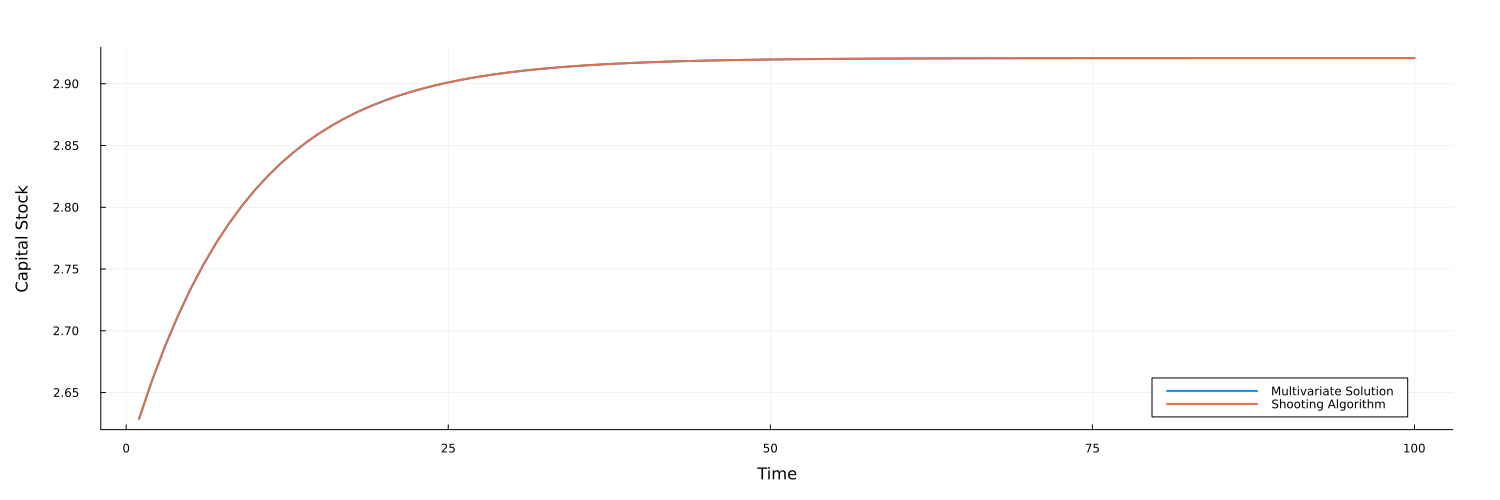

In [18]:
k0=0.9*k̄
plot(solveMITshock(para,k0).k[1:100],label="Multivariate Solution",xlabel="Time",ylabel="Capital Stock")
plot!(getshootingpath(para,findoptimal_c(para,k0),k0).k,label="Shooting Algorithm",legend=true)

## Compare To Shooting: Above Steady State

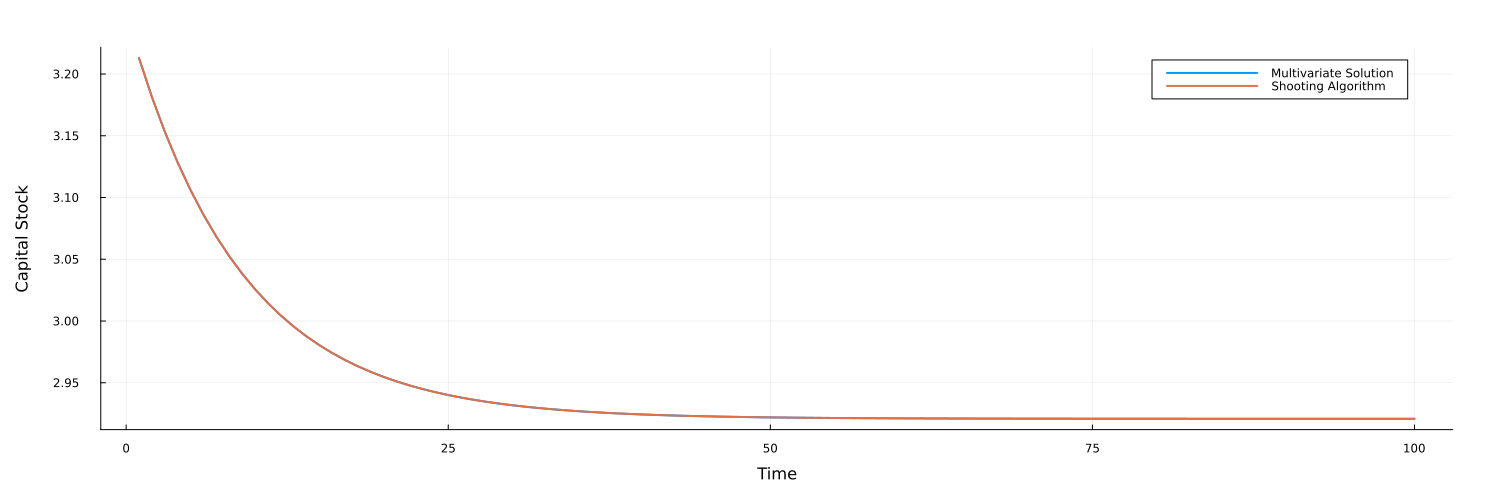

In [19]:
k0=1.1*k̄
plot(solveMITshock(para,k0).k[1:100],label="Multivariate Solution",xlabel="Time",ylabel="Capital Stock")
plot!(getshootingpath(para,findoptimal_c(para,k0),k0).k,label="Shooting Algorithm",legend=true)

## Exercise 2
Now assume that utility is given by 
$$
    U(c,l) = \sum_{t=0}^\infty \beta^t\left(\frac{c_t^{1-\sigma}}{1-\sigma} - \frac{l_t^{1+\gamma}}{1+\gamma}\right)
$$

The aggregate feasibility constraint is given by
$$
C_t + K_t = AK_{t-1}^\alpha L_t^{1-\alpha} + (1-\delta)K_{t-1}
$$

* Update the perfect forsight model for the following parameters

In [36]:
@with_kw mutable struct RBCParameters
    A::Float64 = 1.  #Productivity
    α::Float64 = 0.3 #Capital Share of Output
    β::Float64 = 0.96 #Discount Factor
    δ::Float64 = 0.1 #Depreciation Rate
    σ::Float64 = 2.  #1/IES
    γ::Float64 = 2. #Labor Elasticity
end;